In questa parte ci occupiamo della parte 'demografica' della Serie A. Adremo ad analizzare come son distribuite le età, le nazionalità ed i minuti giocati, per i portieri.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = ['portieri_23.xlsx', 'portieri_22.xlsx', 'portieri_21.xlsx', 'portieri_20.xlsx', 'portieri_19.xlsx']

# Faccio un dizionario per mappare i file agli anni
year= {'portieri_23.xlsx': 2023, 'portieri_22.xlsx':2022, 'portieri_21.xlsx':2021, 'portieri_20.xlsx':2020,
        'portieri_19.xlsx':2019}


Dopo aver importato i file necessari andiamo ad analizzare come sono variate le età nei 5 anni analizzati, visualizziamo il tutto con un diagramma a torta.


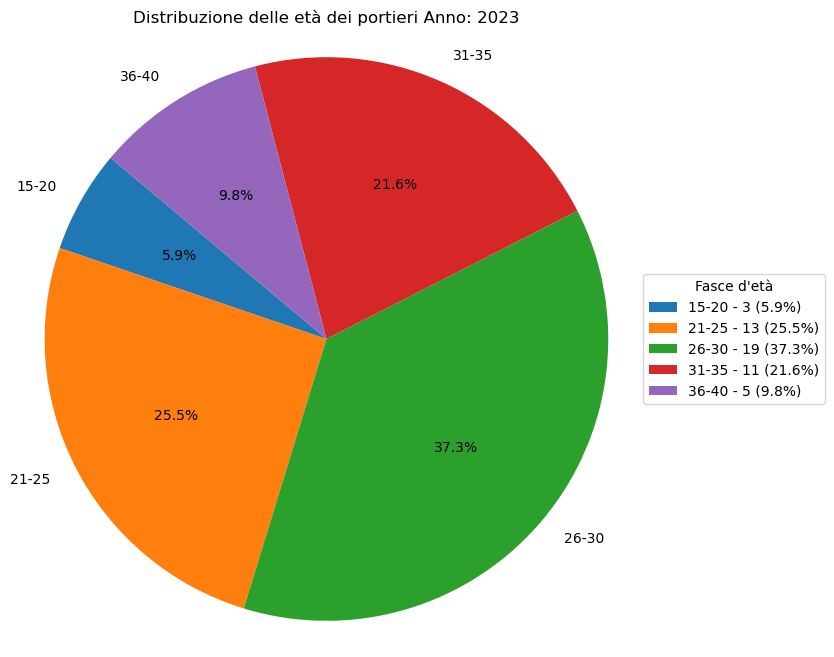

La media dell'età per l'anno 2023 è: 27.98


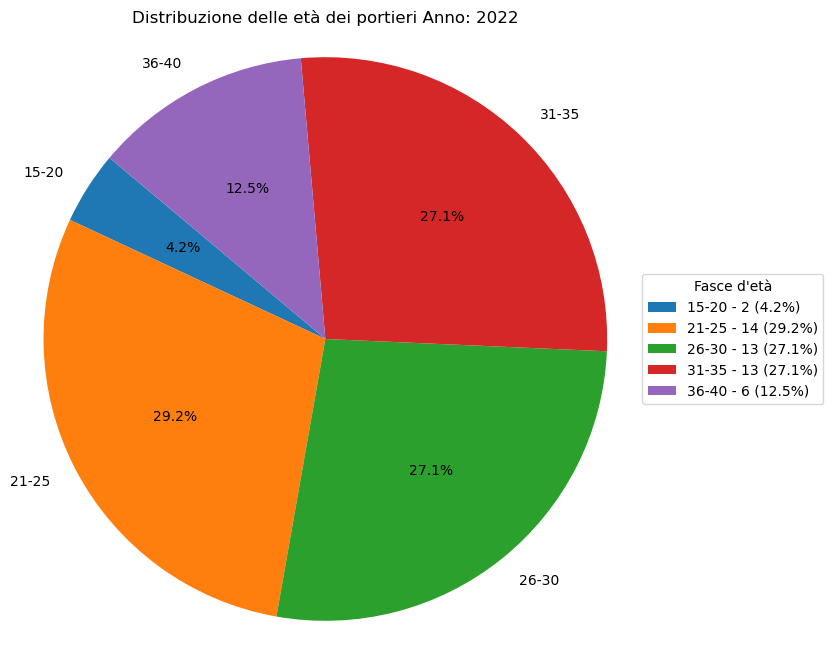

La media dell'età per l'anno 2022 è: 29.04


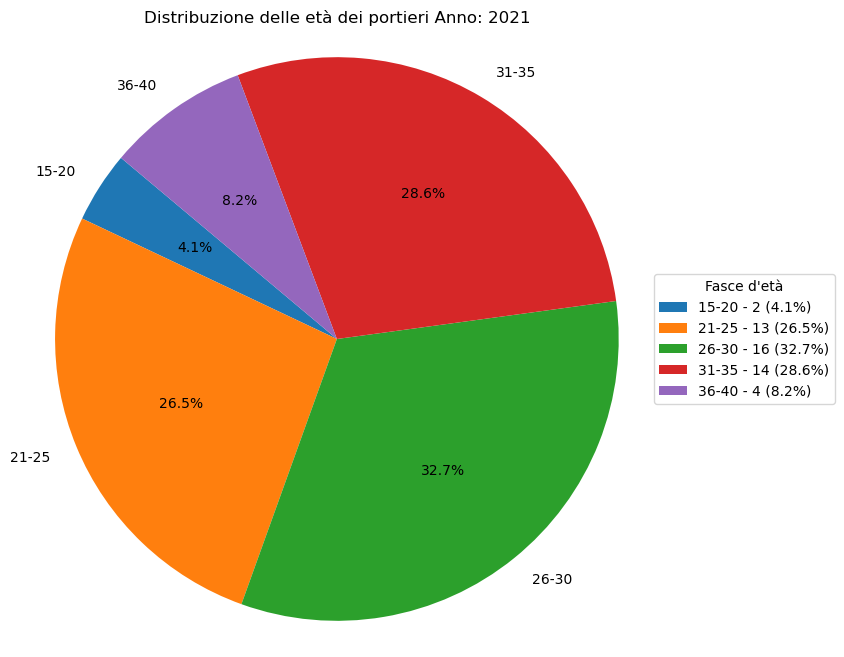

La media dell'età per l'anno 2021 è: 28.47


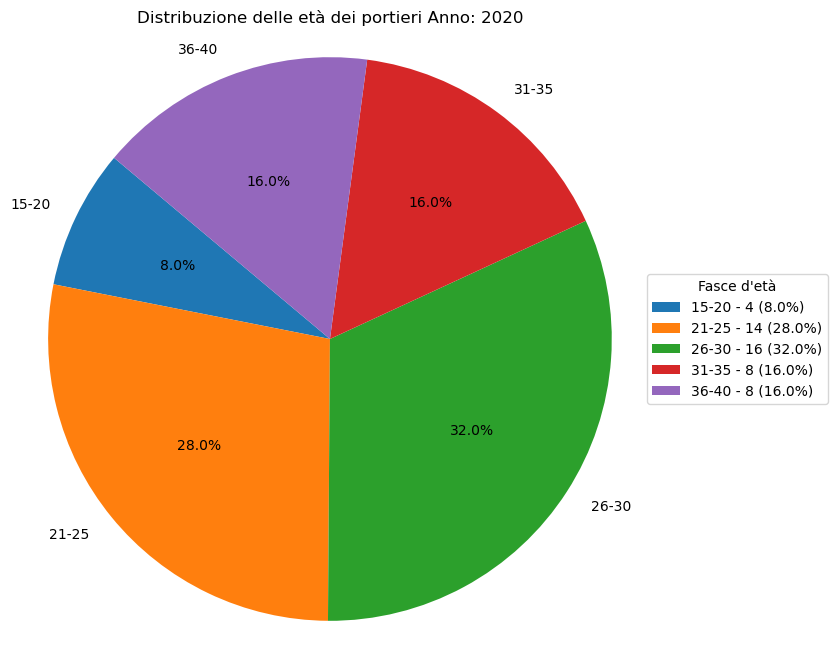

La media dell'età per l'anno 2020 è: 28.55


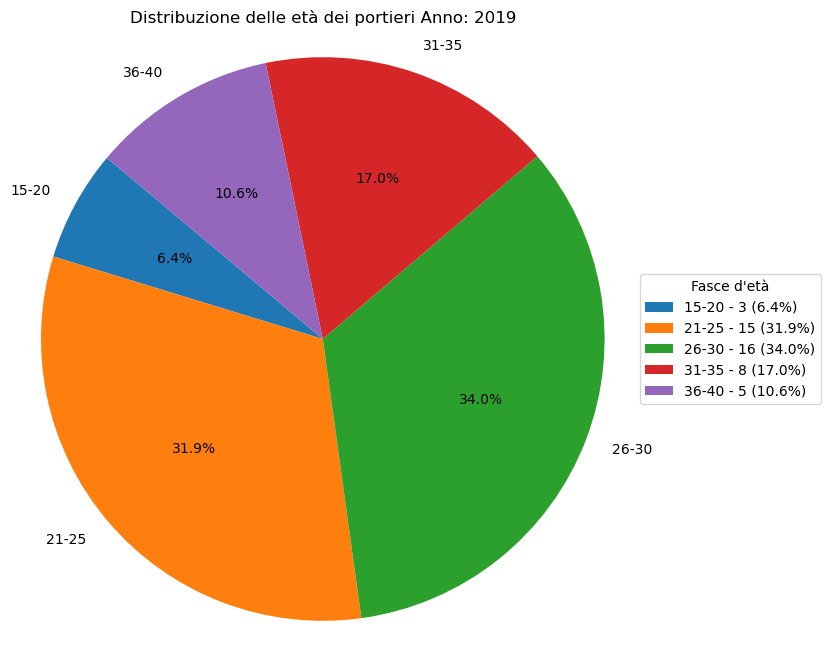

La media dell'età per l'anno 2019 è: 27.81


In [8]:
# Diagrammi a torta

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Ciclo sui file per generare i grafici
for file in files:
    # Leggi i dati da ogni file (si presuppone che ci sia una colonna 'Age')
    data = pd.read_excel(file)
    eta = data['Age']

    # Categorizza le età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

    # Conta il numero di attaccanti in ciascuna fascia
    eta_counts = eta_bins.value_counts().sort_index()

    # Crea una figura e un oggetto ax
    fig, ax = plt.subplots(figsize=(8, 8))

    # Crea il diagramma a torta sull'oggetto ax
    ax.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)

    # Imposta il titolo per ogni anno
    ax.set_title(f"Distribuzione delle età dei portieri Anno: {year[file]}")

    # Assicura che il grafico sia circolare
    ax.axis('equal')

    # Aggiungi la legenda con i valori percentuali
    ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, 
               pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())],
              title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostra il diagramma a torta
    plt.show()
    
    # Calcola e stampa la media dell'età
    media_eta = eta.mean()
    print(f"La media dell'età per l'anno {year[file]} è: {media_eta:.2f}")

Negli anni la media dell'età dei portieri ha avuto un andamento particolare, infatti nel 2019 l'età media risultava essere 27.81 anni. Con il tempo è aumentata fino ad arrivare a 29.04 anni. Per poi scendere nuovamente, infatti nel 2023 l'età media risulta essere 27.98 anni.

Passiamo ora all'analisi delle nazionalità. Vediamo quali sono le nazionalità più presenti in Serie A.

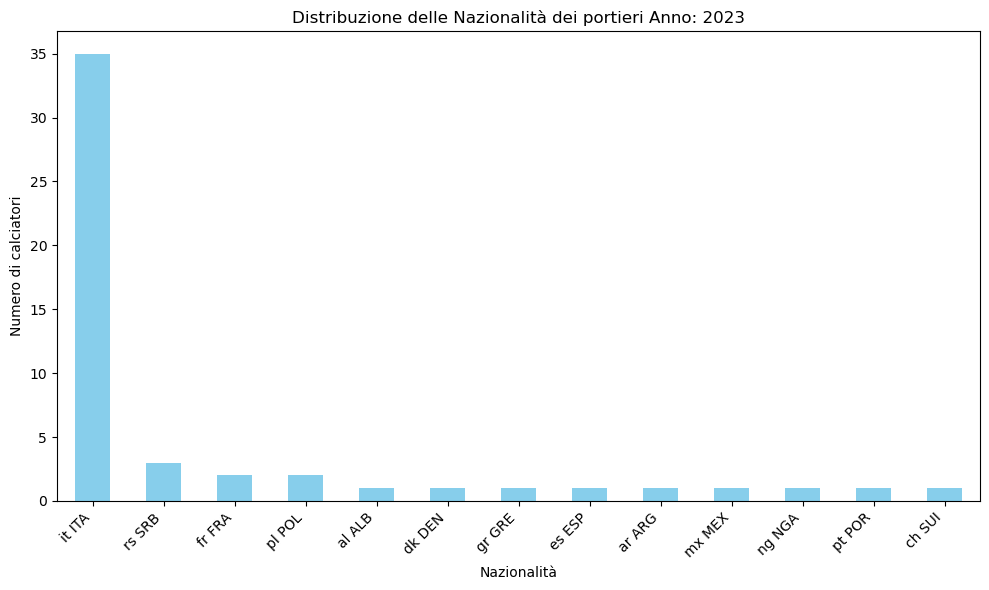

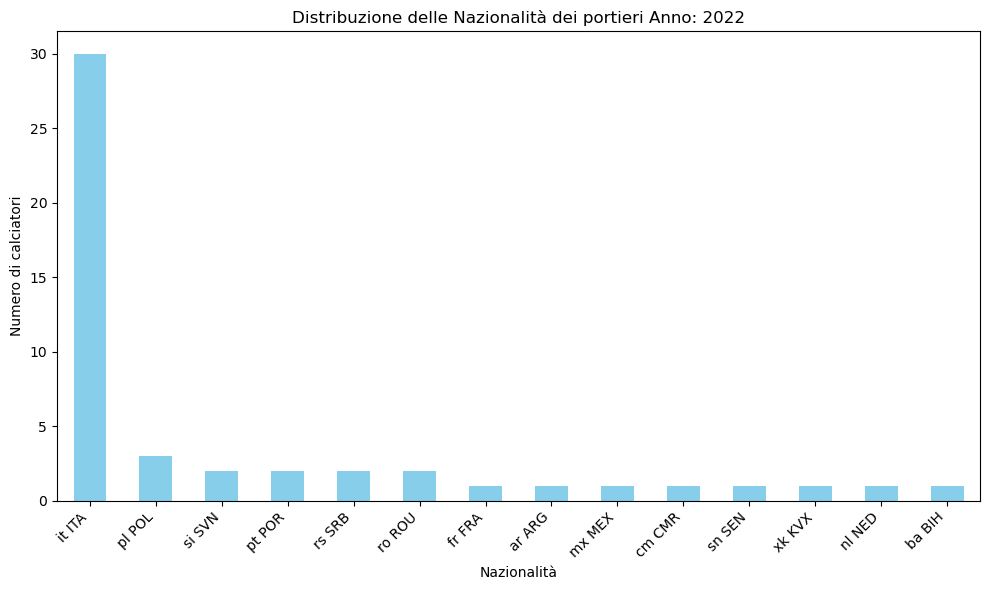

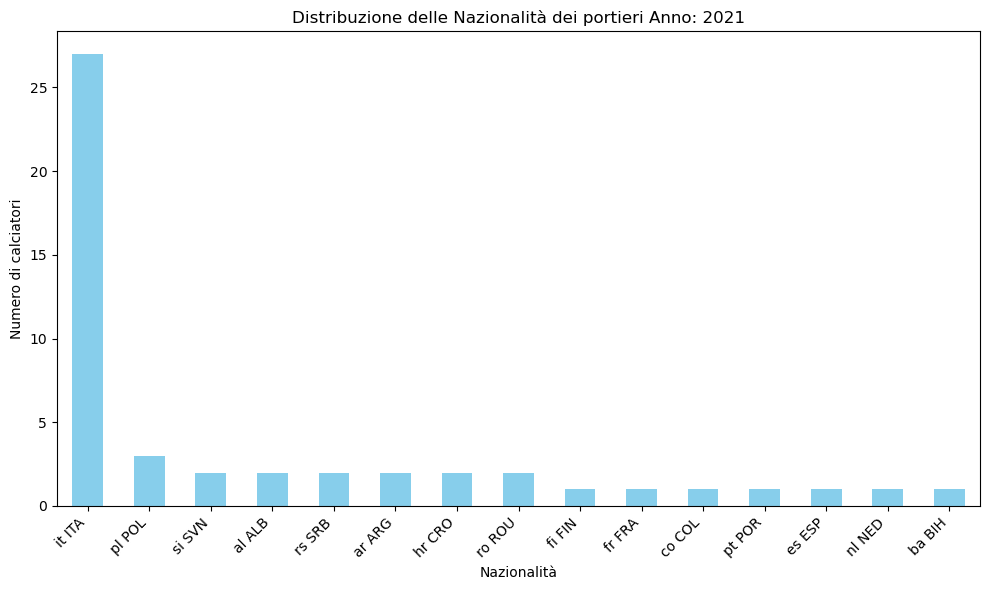

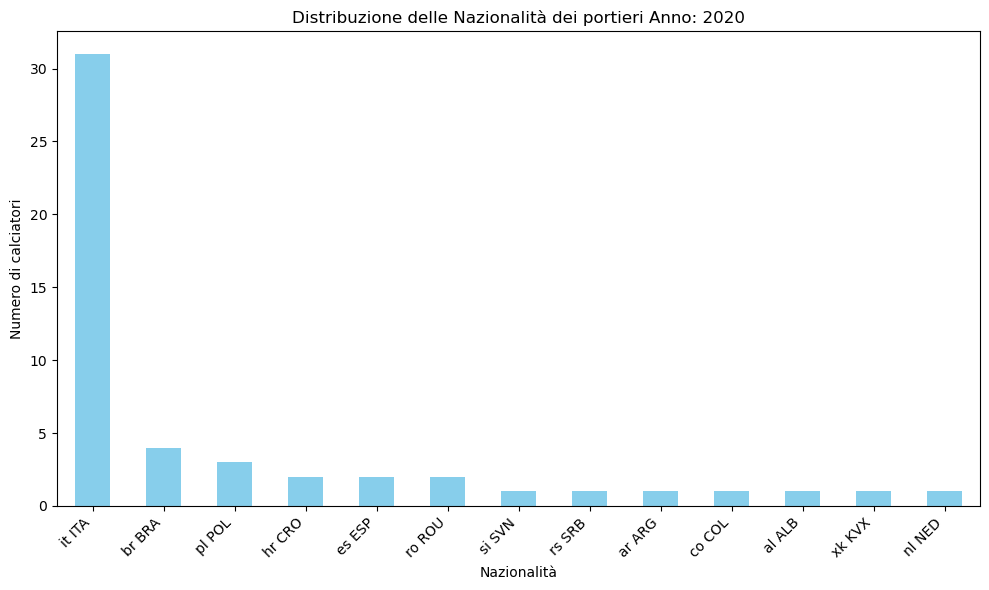

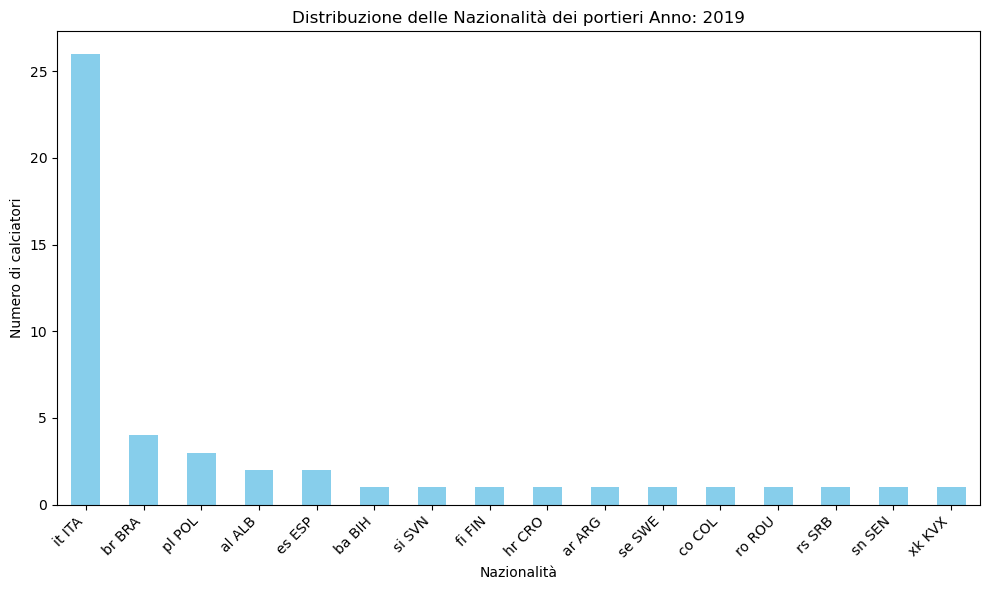

In [9]:
# Ciclo sui file per generare i grafici
for file in files:

    data = pd.read_excel(file)
     
    nazionalita = data['Nation']   #istogramma nazionalità

    # Conta il numero di calciatori per ciascuna nazionalità
    nazionalita_counts = nazionalita.value_counts()

    # Crea l'istogramma
    fig, ax = plt.subplots(figsize=(10, 6))
    nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Aggiungi i titoli e le etichette
    ax.set_title(f'Distribuzione delle Nazionalità dei portieri Anno: {year[file]}')
    ax.set_xlabel('Nazionalità')
    ax.set_ylabel('Numero di calciatori')

    # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.xticks(rotation=45, ha='right')

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

La prima cosa che si nota è che rispetto agli altri ruoli sono presenti molte meno nazionalità. Anche qui l'italia fa da padrona, essendo prima in tutte le stagioni. Notiamo inoltre che, tolta ovviamente l'Italia l'unica nazione che viene rappresentata da diversi giocatori è la Polonia.

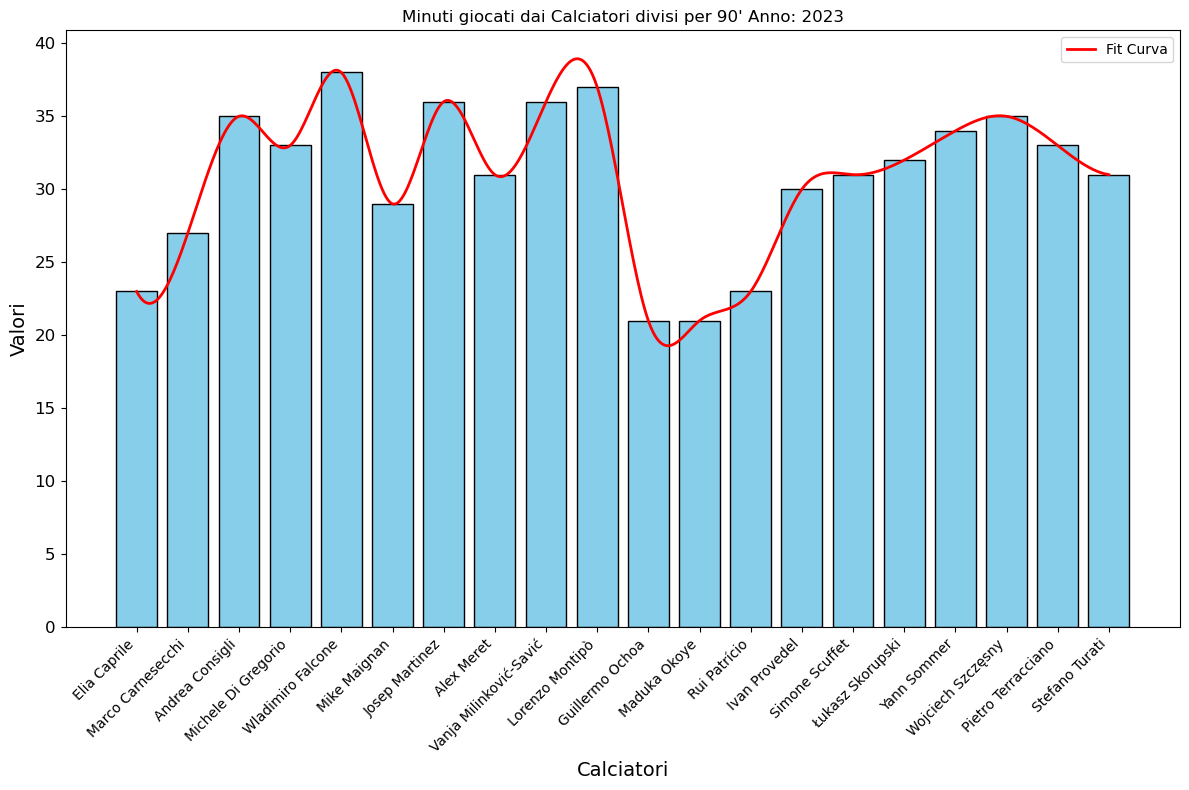

La media per l'Anno 2023 è:30.8


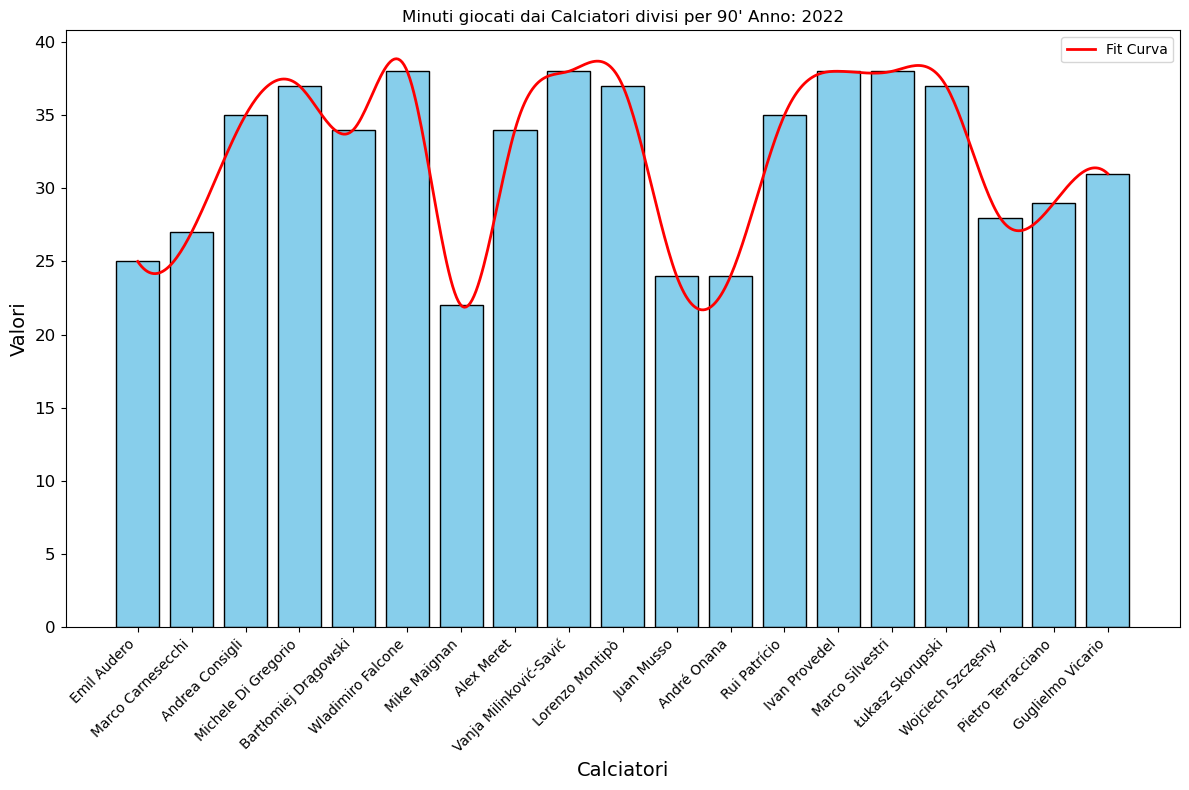

La media per l'Anno 2022 è:32.1578947368421


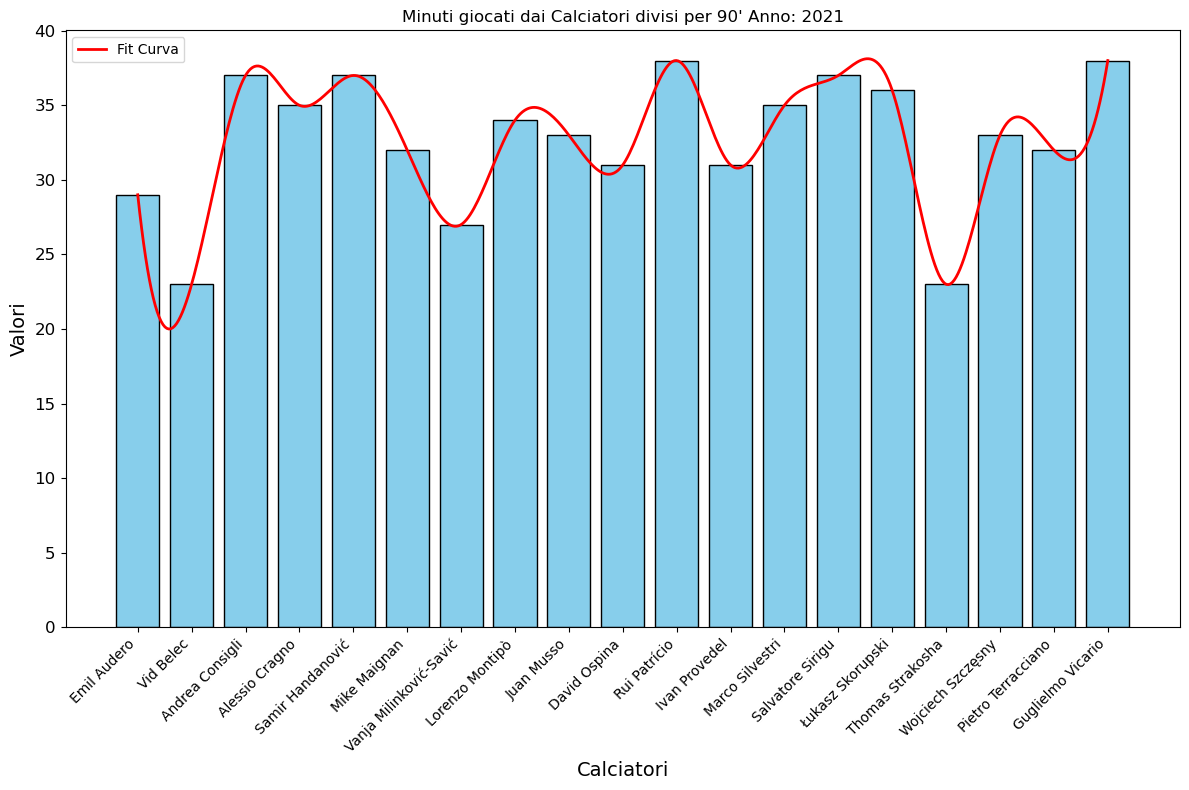

La media per l'Anno 2021 è:32.68421052631579


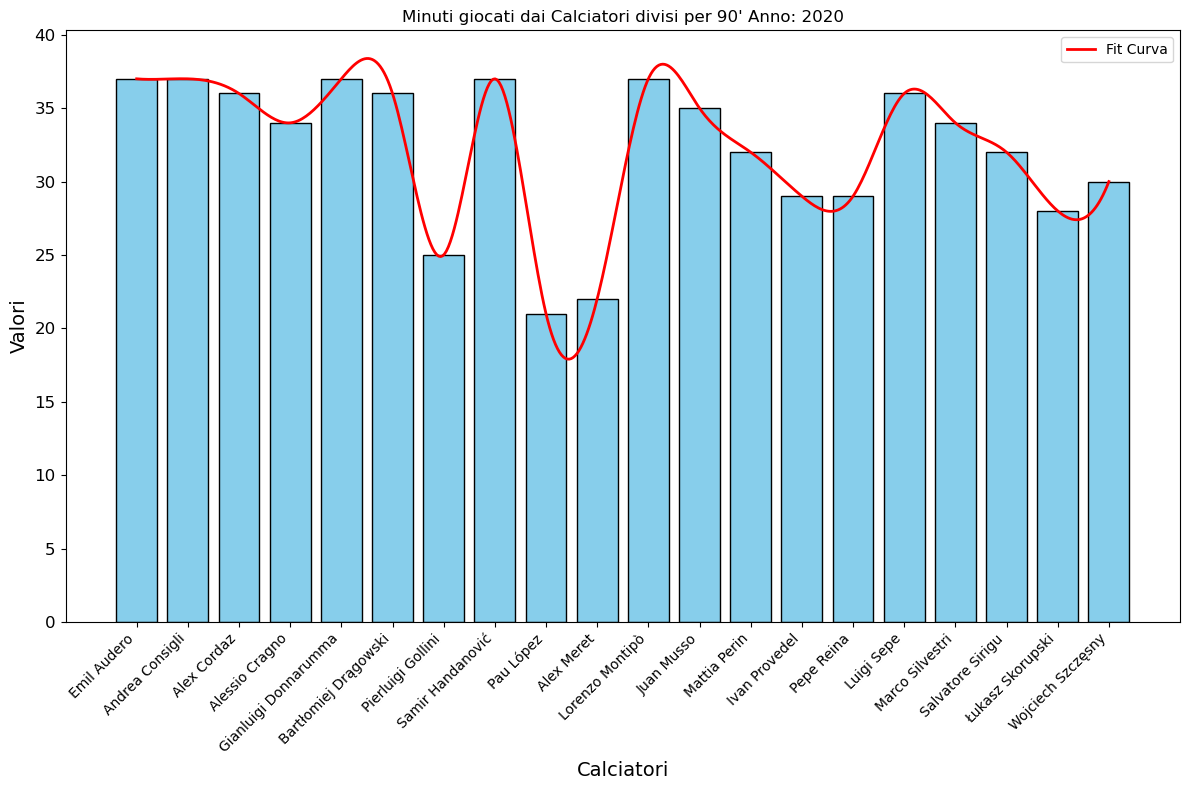

La media per l'Anno 2020 è:32.2


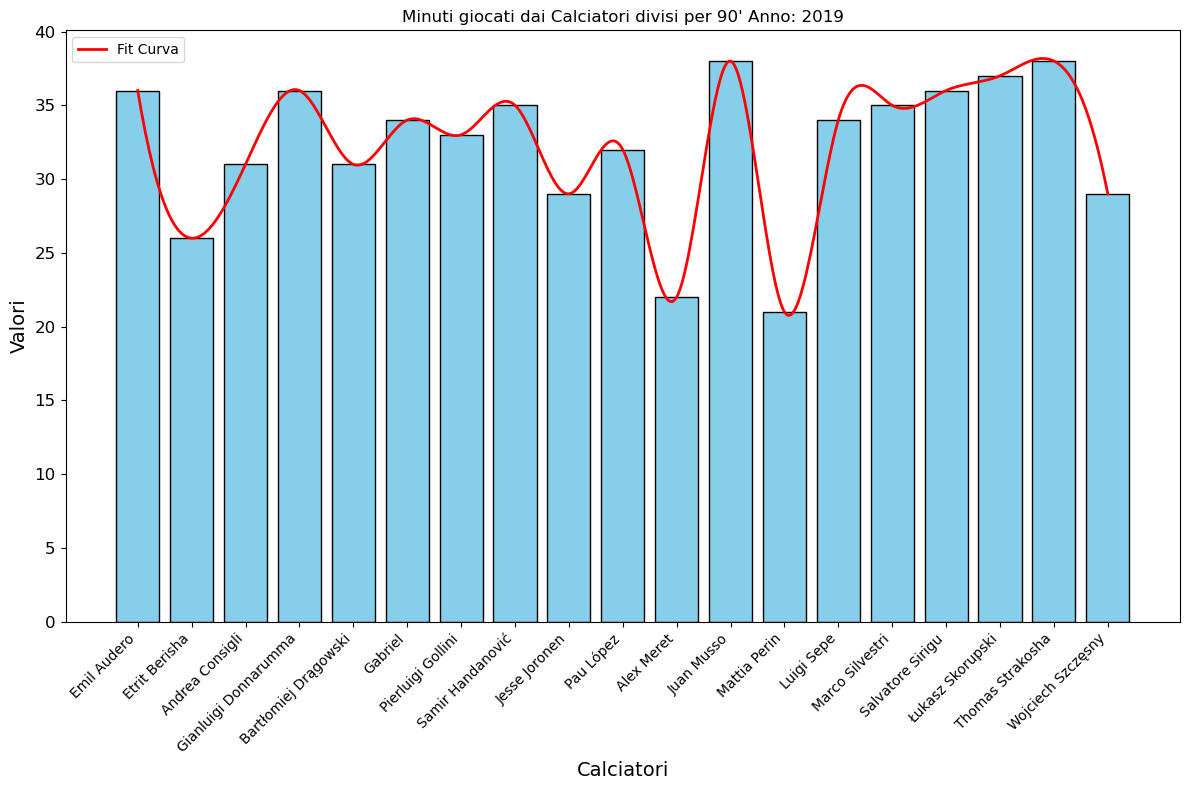

La media per l'Anno 2019 è:32.26315789473684


In [10]:
import numpy as np
from scipy.interpolate import make_interp_spline
for file in files:
 data = pd.read_excel(file)

 # Estrai i dati rilevanti (calciatori e valori nella settima colonna)
 calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
 valori = data['MP']      # Settima colonna partendo da sinistra

 filtrato = valori > 20
 calciatori_filtrati = calciatori[filtrato]
 valori_filtrati = valori[filtrato]

 # Crea un istogramma
 plt.figure(figsize=(12, 8))
 plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

 # Ottimizza il layout
 plt.xlabel('Calciatori', fontsize=14)
 plt.ylabel('Valori', fontsize=14)
 plt.title(f"Minuti giocati dai Calciatori divisi per 90' Anno: {year[file]}")
 plt.xticks(rotation=45, ha='right', fontsize=10)
 plt.yticks(fontsize=12)

 # Aggiungi una curva di fit
 x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
 spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
 x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
 y_smooth = spl(x_smooth)

 plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

 plt.tight_layout()
 plt.legend()
 plt.show()

 media_valori_filtrati = valori_filtrati.mean()

 # Mostra il risultato
 print(f"La media per l'Anno {year[file]} è:{media_valori_filtrati}")

Come era logico aspettarsi, essendo il portiere un ruolo che viene raramente sostituito, la media dei minuti giocati su 90 è molto alta per tutti gli anni. Possiamo notare anche picchi di portieri che hanno giocato addirittura tutte e 38 le partite. Il motivo per cui le squadre non mettono sempre i portieri titolari è per il turnover (mettere i "secondi" giocatori per far riposare i titolari in vista di partite più importanti)

C:\Users\aless\AppData\Local\Temp\ipykernel_12212\2572640604.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


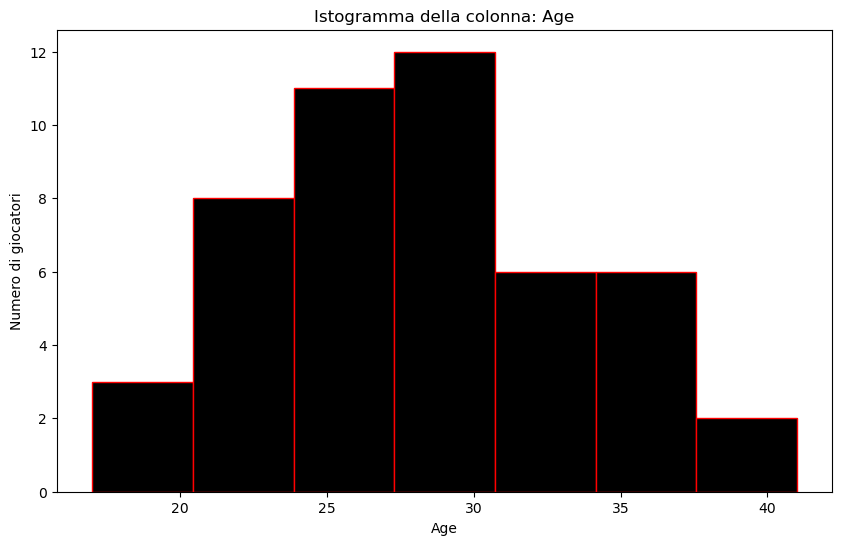

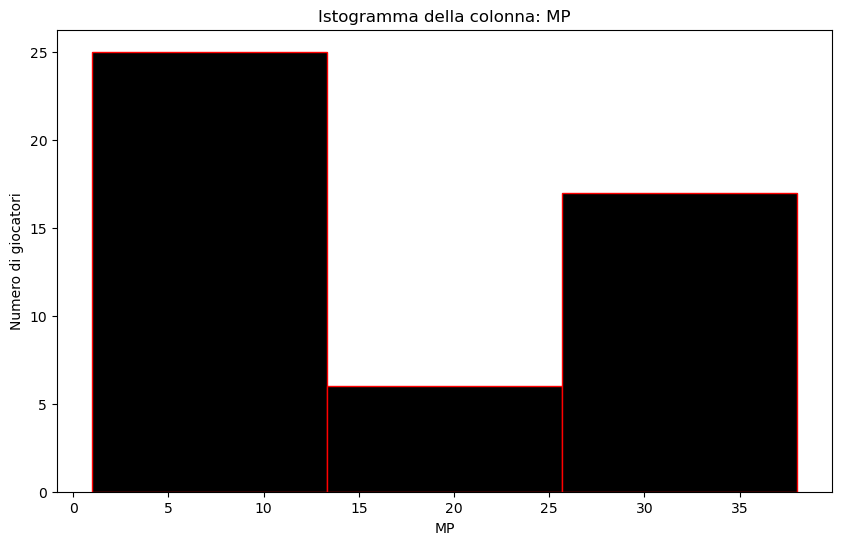

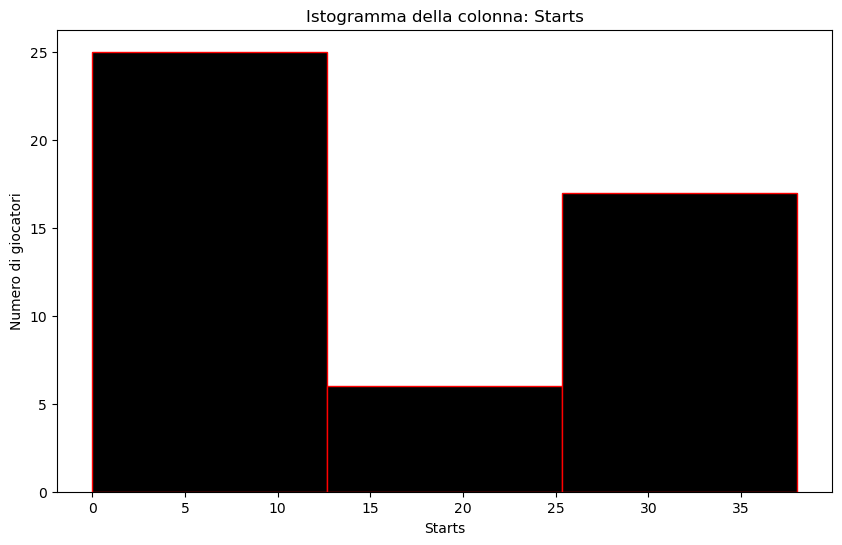

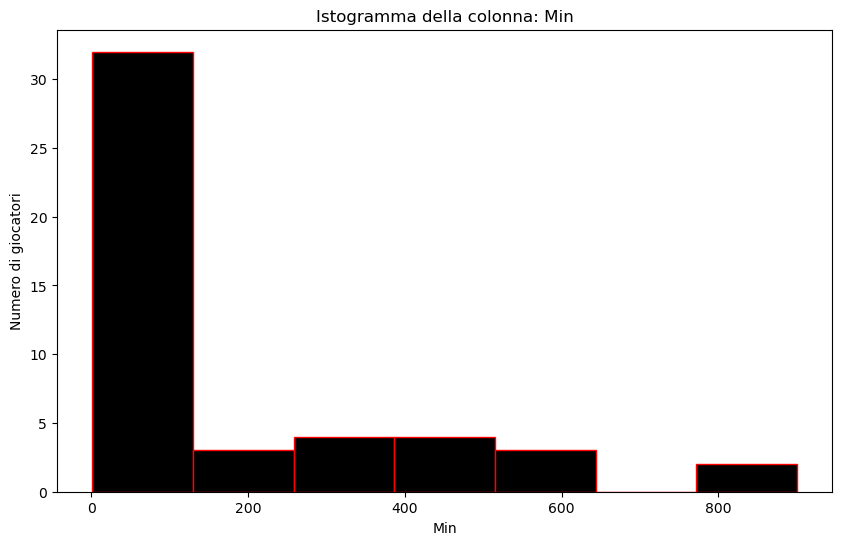

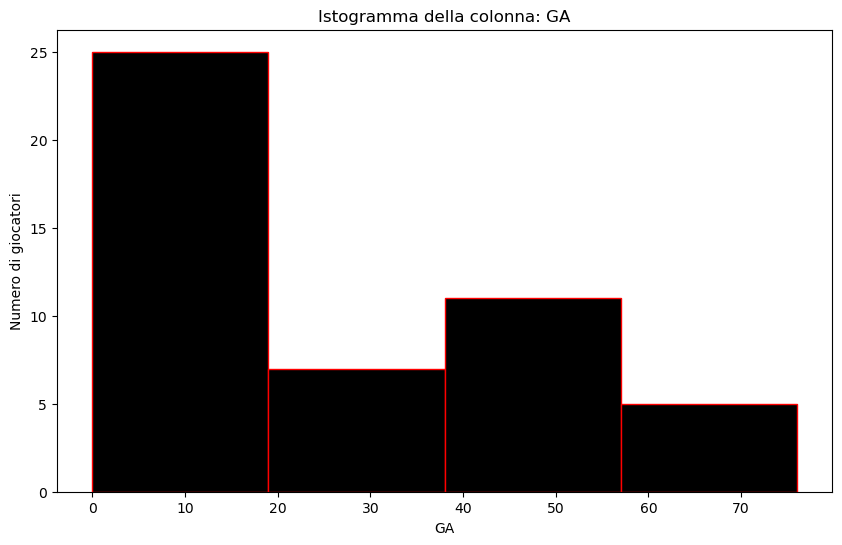

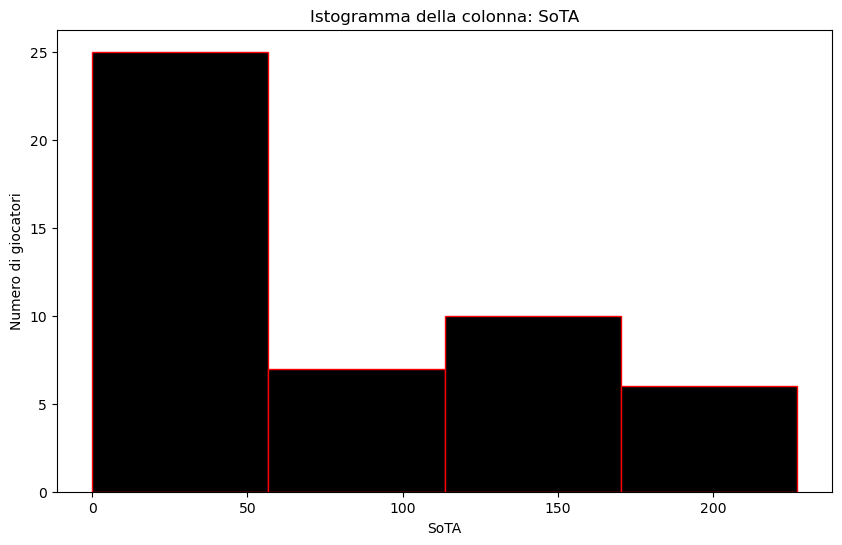

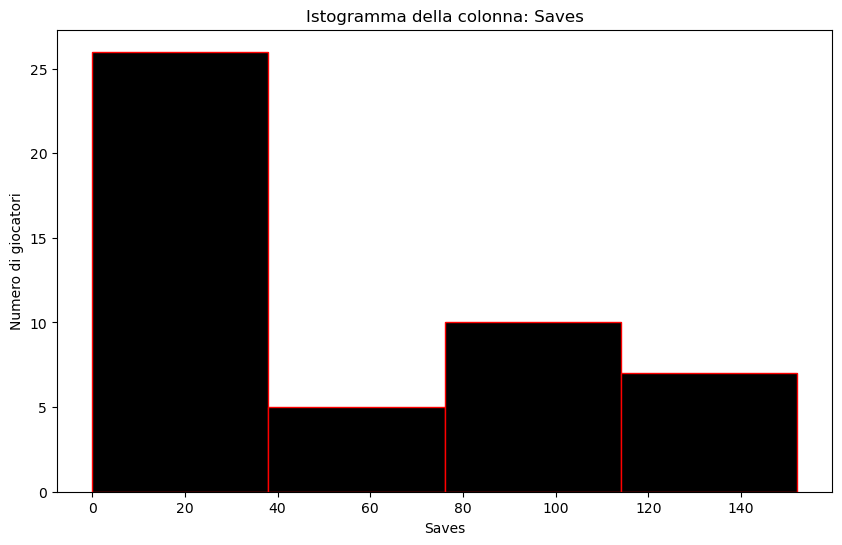

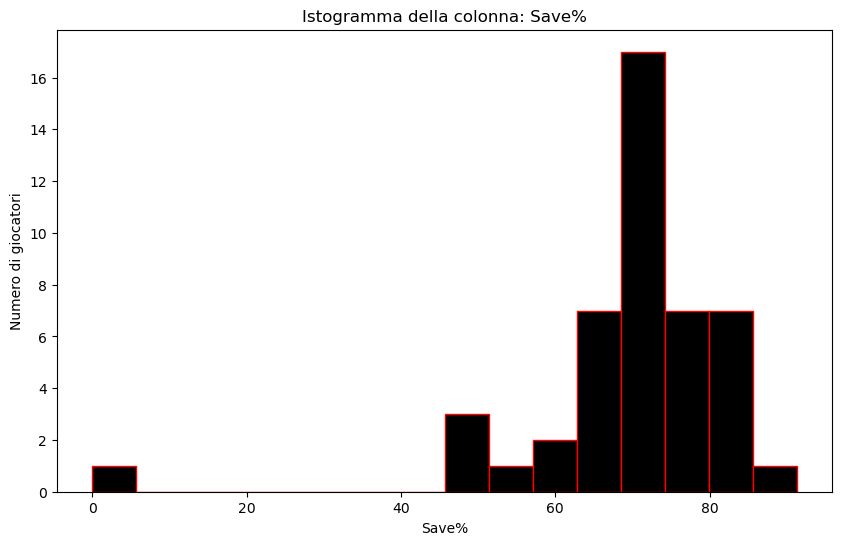

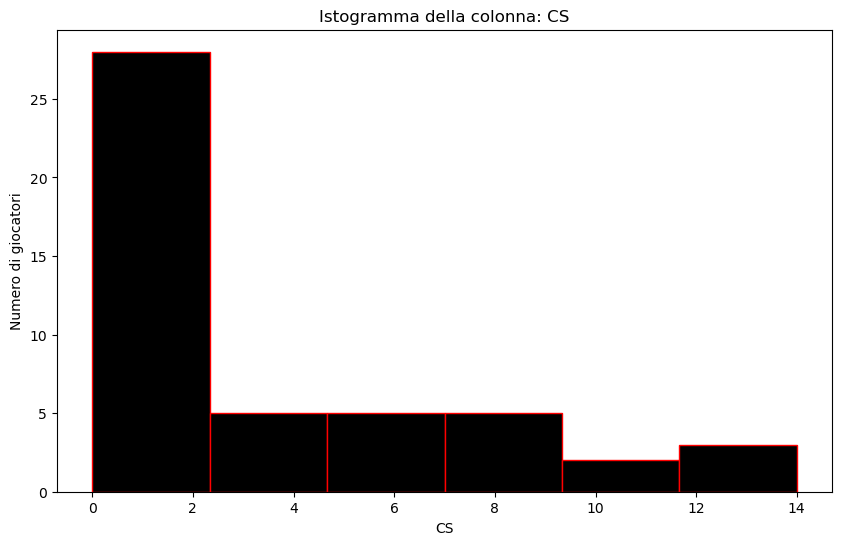

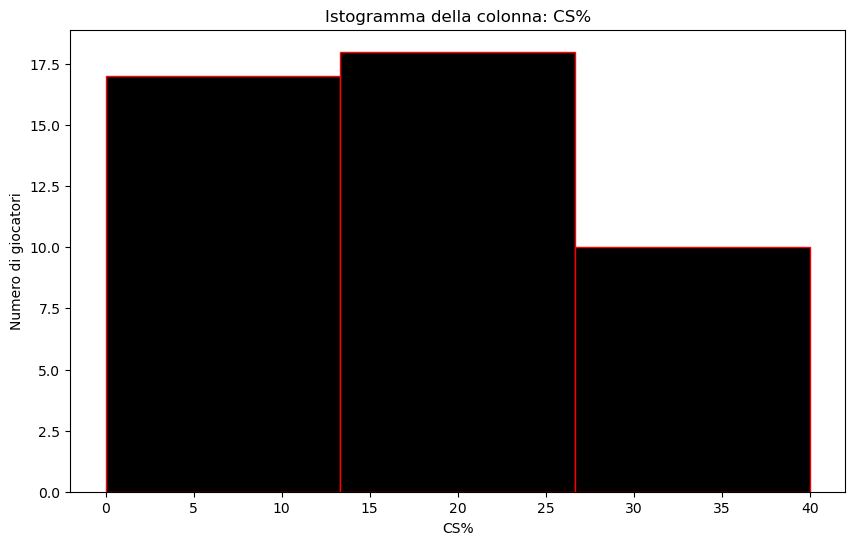

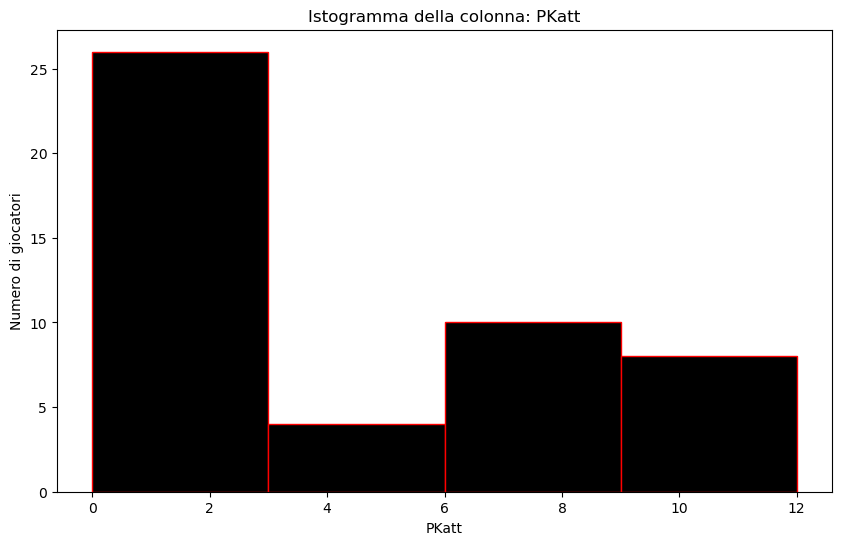

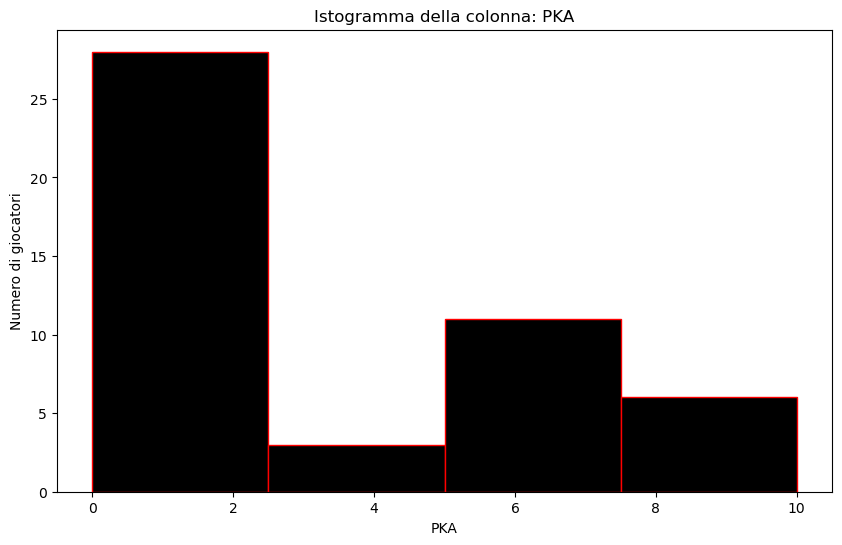

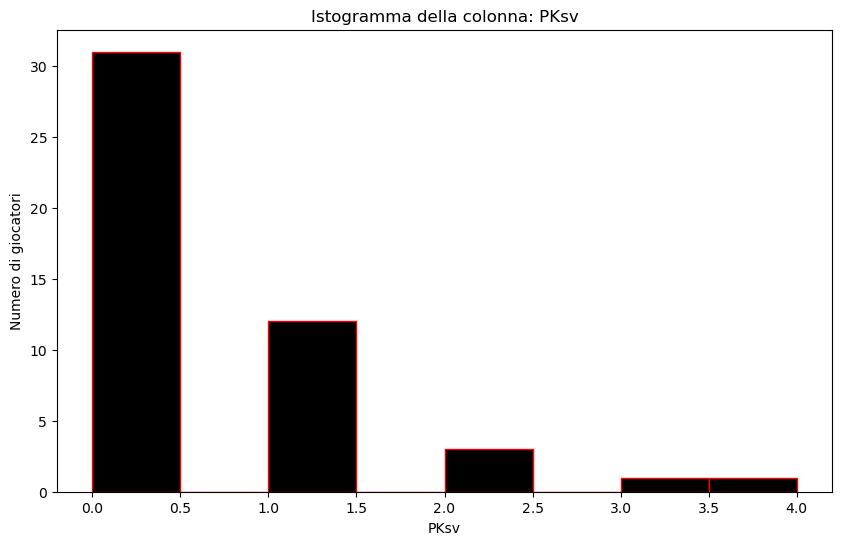

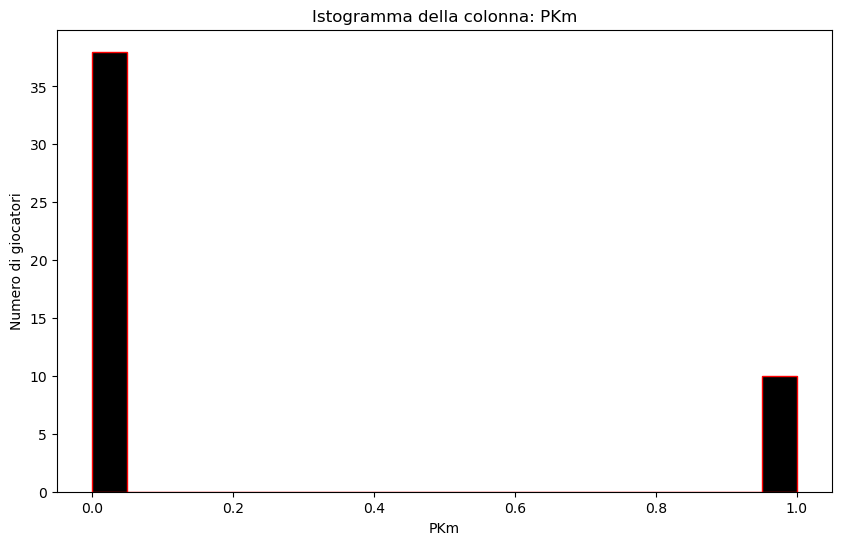

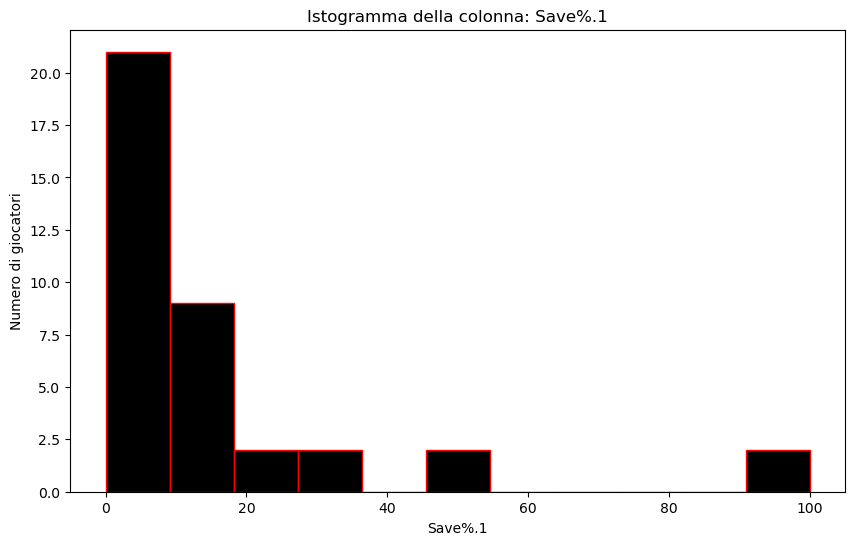

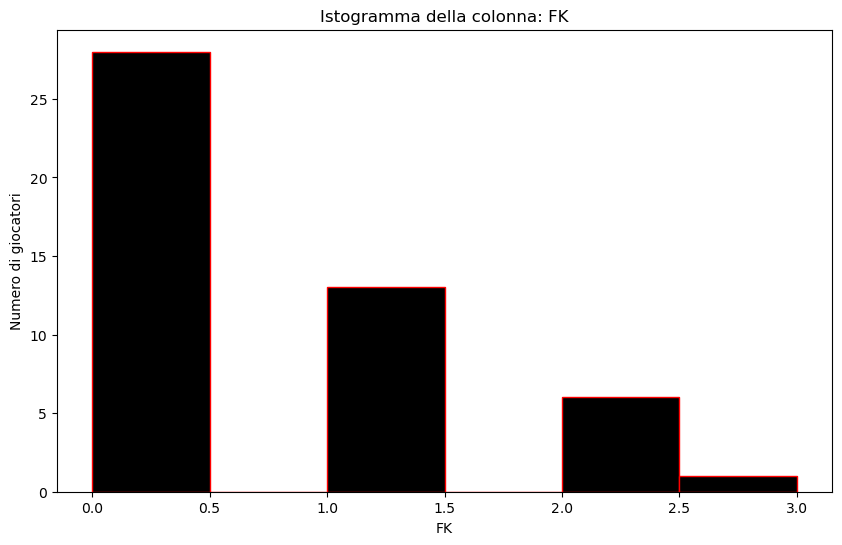

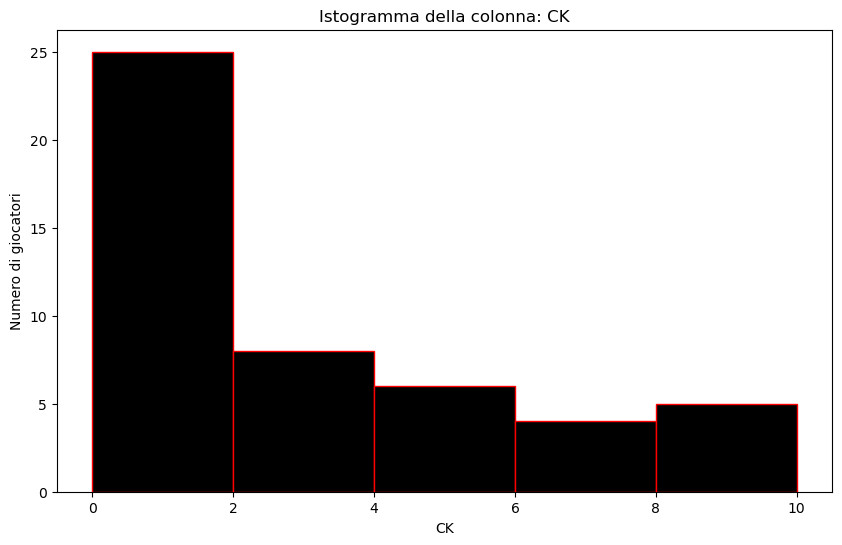

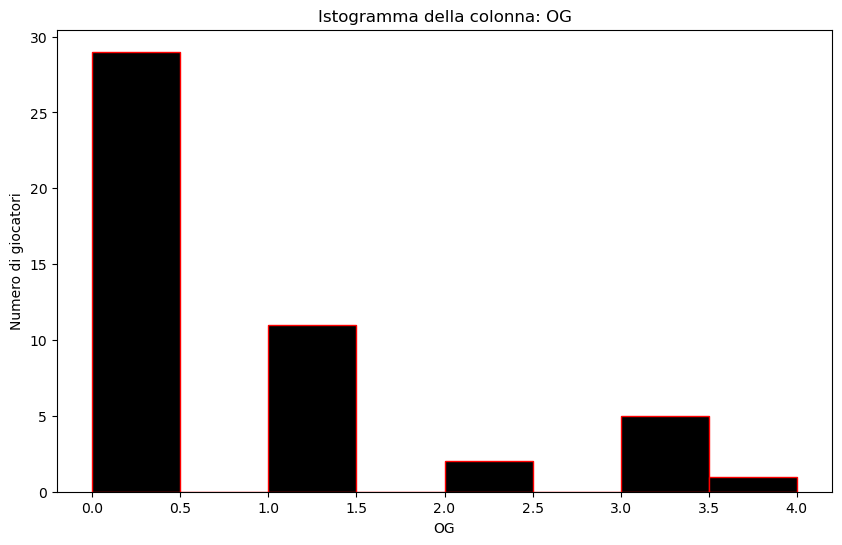

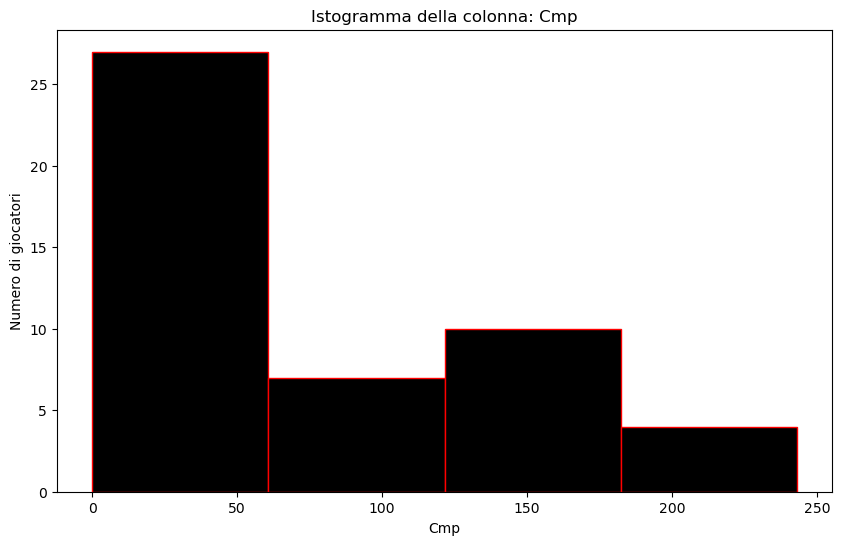

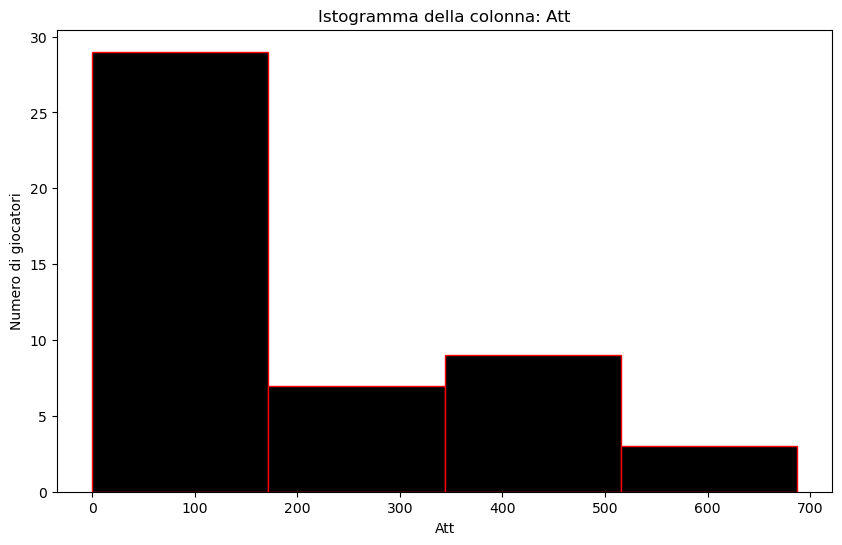

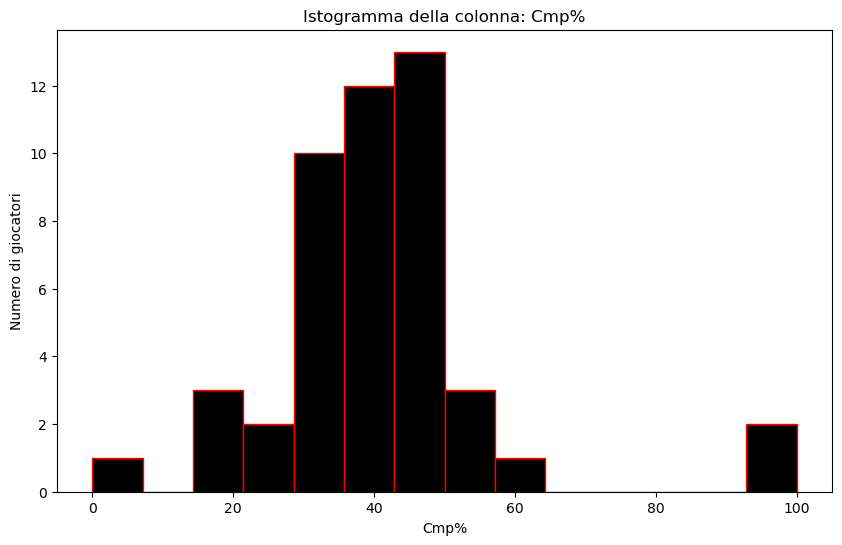

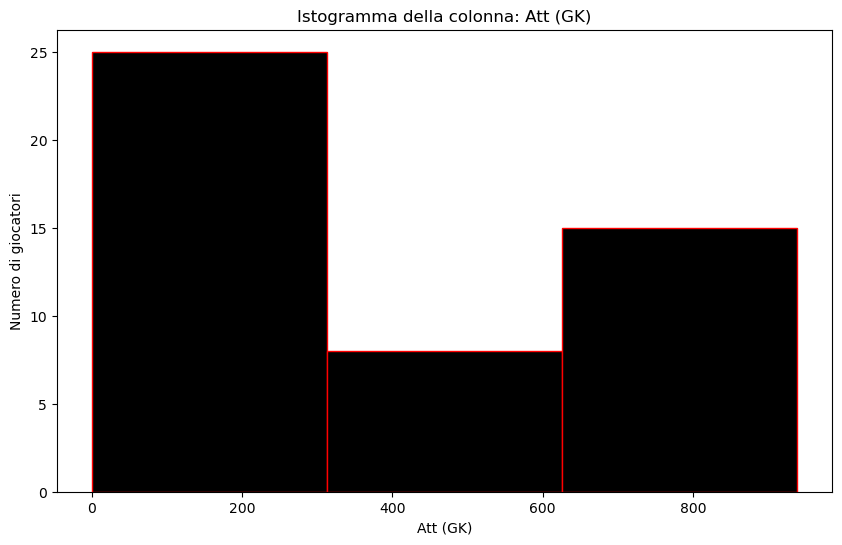

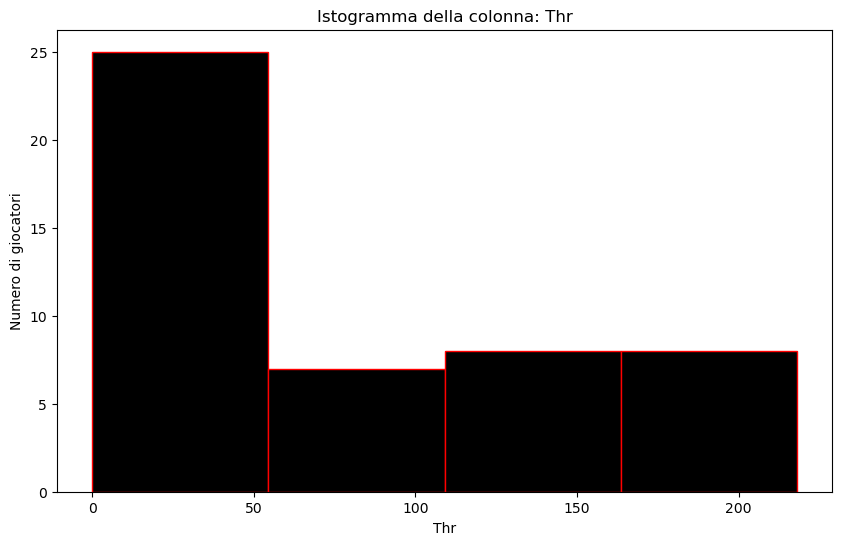

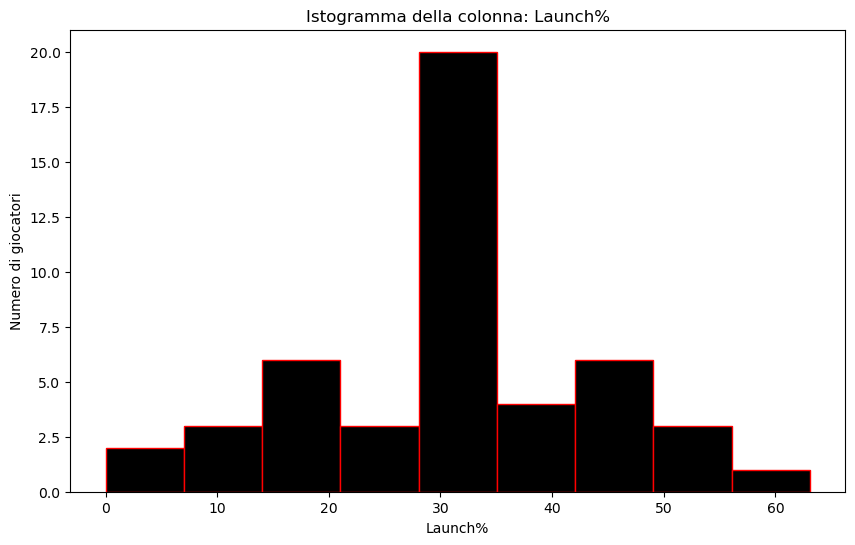

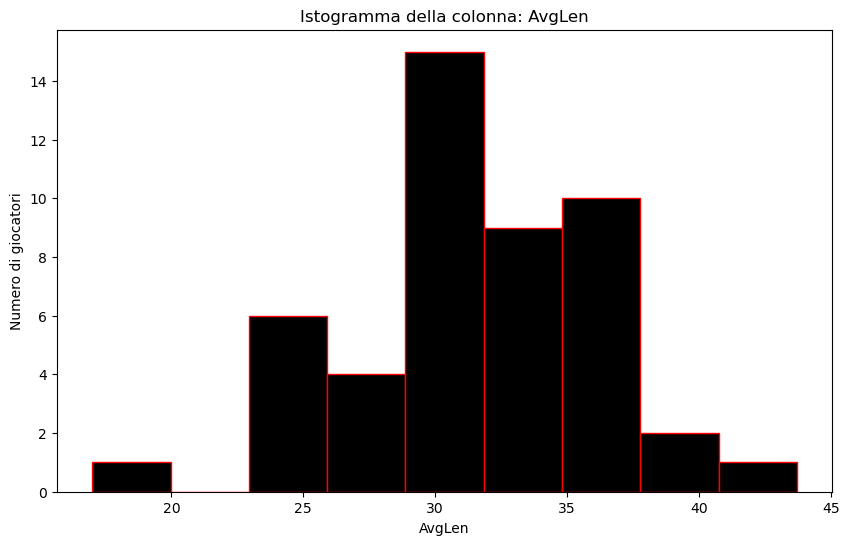

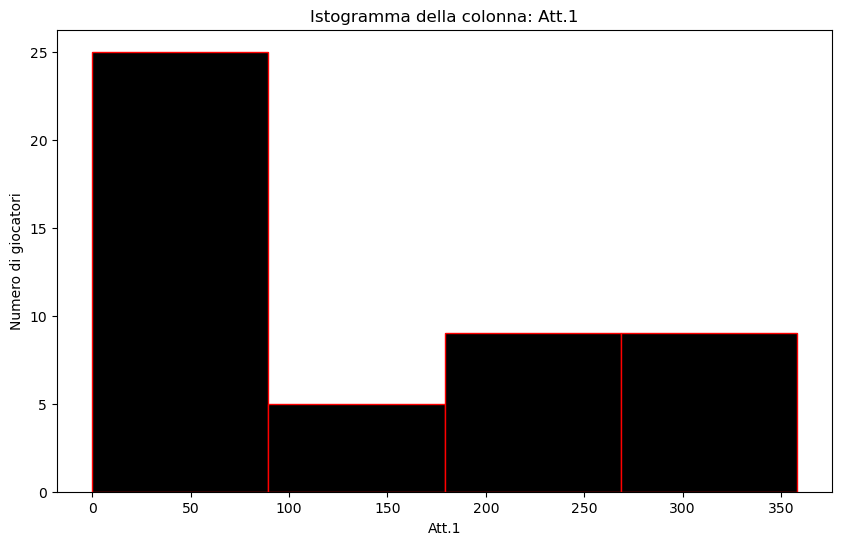

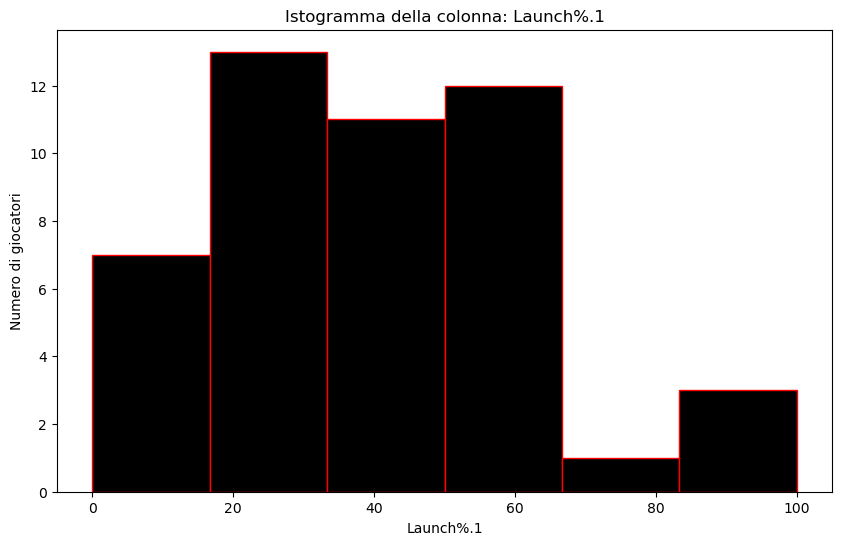

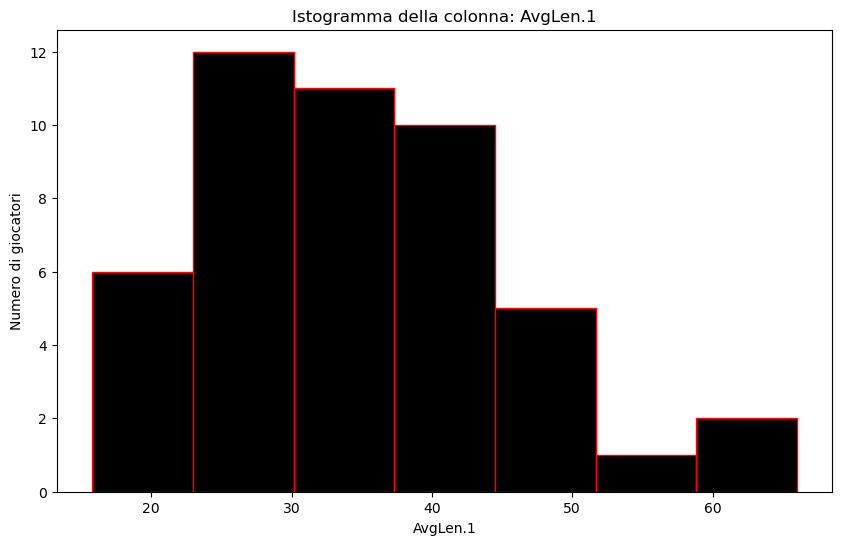

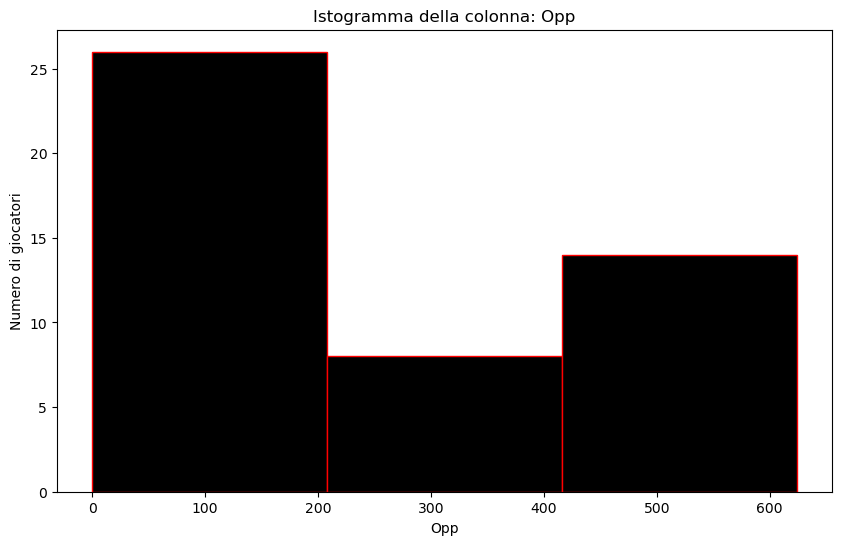

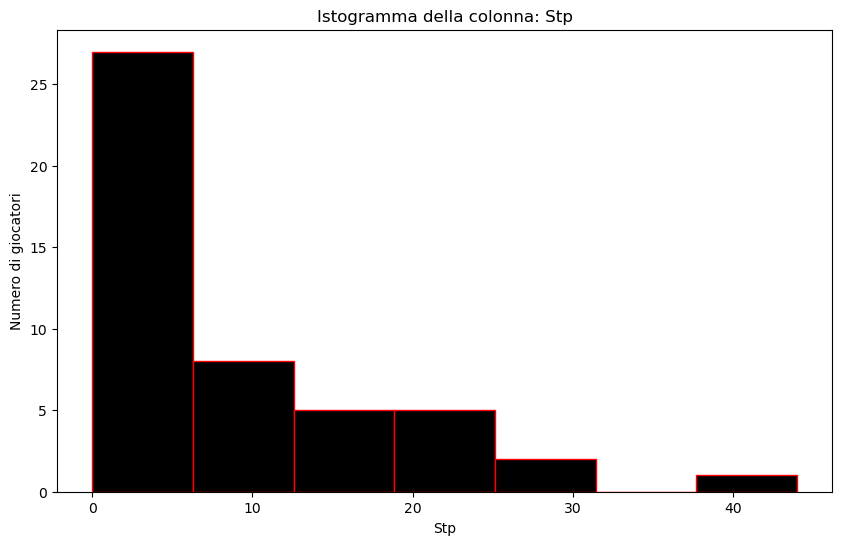

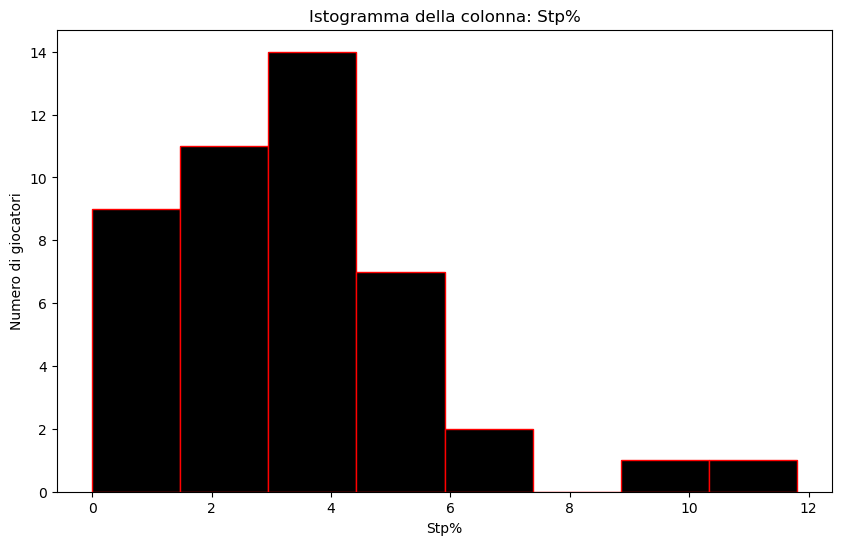

In [11]:
import scipy.stats as stats
import numpy as np

for file in files:
 data = pd.read_excel(file)

# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=[np.number])

# Funzione per calcolare il numero di bin con la regola di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:  # Evitare divisioni per zero
        return 20  # Numero di bin di default in caso di IQR nullo
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    if bin_width == 0:
        return 5  # Numero di bin di default in caso di width troppo piccolo
    return int(np.ceil((data.max() - data.min()) / bin_width))

# Creare istogrammi per ogni colonna numerica con controllo su variazioni minime
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()  # Rimuovi eventuali valori NaN
    if col_data.empty or col_data.max() == col_data.min():
        continue
    
    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    bins = freedman_diaconis_bins(col_data)
    
    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor = 'r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    #plt.show()
    media = col_data.mean()
    #print(f"La media di {column} per l'anno {year[file]} è: {media:.2f}")

Con questa funzione possiamo richiamare dei grafici specifici e analizzarli se ci interessa.

In [12]:
# Mappatura dei file agli anni
year_mapping = {2023: 'portieri_23.xlsx', 2022: 'portieri_22.xlsx', 2021: 'portieri_21.xlsx',2020: 'portieri_20.xlsx',
    2019: 'portieri_19.xlsx'}

def istogramma(statistica, anno):
    # Verifica che l'anno esista nel mapping
    if anno not in year_mapping:
        print(f"L'anno {anno} non è valido. Gli anni disponibili sono: {list(year_mapping.keys())}")
        return

    # Carica il dataset corrispondente all'anno
    file = year_mapping[anno]
    data = pd.read_excel(file)

    # Seleziona la colonna specificata
    if statistica not in data.columns:
        print(f"La statistica '{statistica}' non è presente nei dati.")
        return
    
    col_data = data[statistica].dropna()  # Rimuovi eventuali valori NaN

    if col_data.empty or col_data.max() == col_data.min():
        print(f"La colonna '{statistica}' non ha abbastanza variabilità per creare un istogramma.")
        return

    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    def freedman_diaconis_bins(data):
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        if iqr == 0:  # Evitare divisioni per zero
            return 20  # Numero di bin di default in caso di IQR nullo
        bin_width = 2 * iqr / (len(data) ** (1 / 3))
        if bin_width == 0:
            return 5  # Numero di bin di default in caso di width troppo piccolo
        return int(np.ceil((data.max() - data.min()) / bin_width))

    # Calcolare il numero di bin
    bins = freedman_diaconis_bins(col_data)

    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor='r', label='Dati')

    # Titolo e etichette con l'anno specificato
    plt.title(f'Istogramma della colonna: {statistica} ({anno})')
    plt.xlabel(f'{statistica}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()

    # Calcola e stampa la media della colonna
    media = col_data.mean()
    print(f"La media di {statistica} per l'anno {anno} è: {media:.2f}")
    giocatore_max = data.loc[data[statistica].idxmax()]['Player']
    max_value = col_data.max()
    print(f"Il giocatore che ha registrato il maggior numero di {statistica} è {giocatore_max} con {max_value:.2f}.")

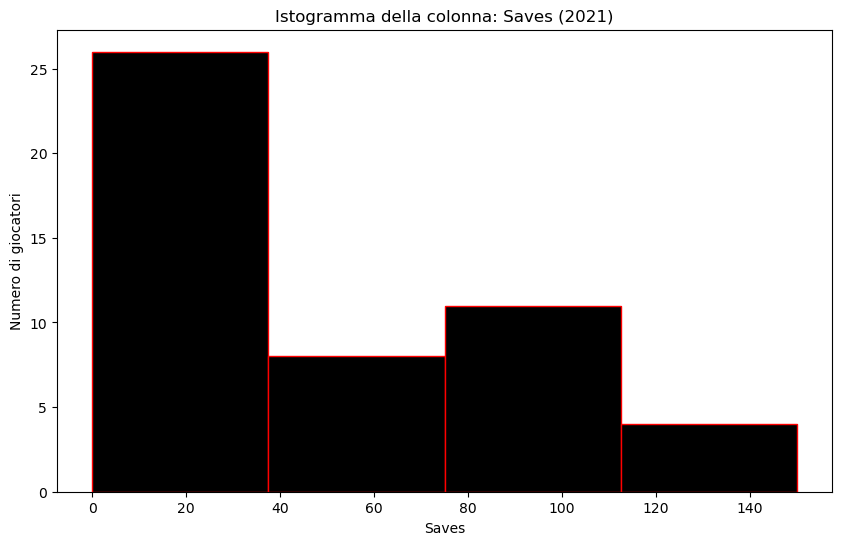

La media di Saves per l'anno 2021 è: 45.47
Il giocatore che ha registrato il maggior numero di Saves è Guglielmo Vicario con 150.00.


In [13]:
statistica = 'Saves'
anno = 2021
istogramma(statistica,anno)

In questa sezione ci occupiamo di analizzare le statistiche dei portieri e capire le correlazione fra queste.

In [14]:
# Importo le librerie necessarie per il codice

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = ['portieri_23.xlsx', 'portieri_22.xlsx', 'portieri_21.xlsx', 'portieri_20.xlsx', 'portieri_19.xlsx']

# Faccio un dizionario per mappare i file agli anni
year_mapping = {'portieri_23.xlsx': 2023,'portieri_22.xlsx': 2022,'portieri_21.xlsx': 2021,'portieri_20.xlsx': 2020,'portieri_19.xlsx': 2019}

Eliminiamo prima le colonne non utili a questa analisi. Iniziamo da quelle di Nome, Nazionalità, Posizione e Squadra. Dopodichè togliamo le colonne con le percentuali e la colonna relativa al numero di rigori subiti dal portiere, in quanto ci interessa di più quanti ne salva o ne concede piuttosto che quelli che gli vengono calciati contro.

In [15]:
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche
# suddiviso per annata
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad', 'Save%', 'CS%', 'PKatt','Save%.1','AvgLen', 'AvgLen.1',
                         'Cmp%', 'Launch%', 'Launch%.1', 'Stp%']

correlations = []
years = []
for file in files:
    
    data_frame = pd.read_excel(file)

    # Uso .drop per rimuovere dal data frame quelle statistiche che non voglio usare in questa analisi
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()  # Calcolo la matrice di correlazione

    year = year_mapping[file]  # Ottengo l'anno dal file usando il mapping
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    # Ottengo in output il grafico di correlazione

    fig.show()

# Inserisco questa riga di codice in modo da poter visualizzare le colonne usate per l'analisi
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

Le colonne usate per questa analisi sono ['Age', 'MP', 'Starts', 'Min', 'GA', 'SoTA', 'Saves', 'CS', 'PKA', 'PKsv', 'PKm', 'FK', 'CK', 'OG', 'Cmp', 'Att', 'Att (GK)', 'Thr', 'Att.1', 'Opp', 'Stp']


In [16]:
# Creo una funzione che mi permette di scoprire quali sono le statistiche meglio e peggio correlate con una desiderata

def best_worst(stat):
 for file in files:
    year = year_mapping[file]
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    if stat in corr_matrix.columns:
        # Ordina le correlazioni con la statistica scelta
        sorted_corr = corr_matrix[stat].sort_values(ascending=False)

        # Trova le 5 migliori e peggiori correlazioni (cambiare i range per saperne di più o di meno)
        best_corr = sorted_corr[1:6]  # Parto da 1 per evitare la correlazione della statistica con se stessa
        worst_corr = sorted_corr[-5:]

        print(f"Anno {year}: Le 5 statistiche meglio correlate con {stat} sono:\n{best_corr}")
        print(f"Anno {year}: Le 5 statistiche peggio correlate con {stat} sono:\n{worst_corr}")
    else:
        print(f"La statistica {stat} non è presente nel dataset. Controlla l'input")

# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file)  

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        #print(f"Anno {year}: Correlazione tra {stat1} e {stat2} = {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")

Le statistiche di gioco si suddividono in 2 macro categorie. Una relativa alle parate o agli interventi realizzati dal portiere, l'altra invece descrive il comportamento del portiere con la palla ai piedi (statistiche su lanci o passaggi).

Iniziamo dalla prima, quella delle parate, ed iniziamo l'analisi con l'età, i minuti e le partite giocate.


In [17]:
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Save%', 'AvgLen', 'AvgLen.1', 'CS%', 'Save%.1', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 
'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%']
correlations = []
years = []
for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr() 

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")

    fig.show()

Il dato sull'età è correlato molto male, gli indici sono tutti vicini allo zero. Risultato abbastanza inaspettato per una posizione del genere, infatti quello del portiere è il ruolo meno fisico e quindi in cui l'età influisce meno a livello di prestazione. Inoltre ci aspettavamo che l'età fosse molto importante, in quanto un portiere più vecchio ha probabilmente più esperienza e più leadership. I dati sulle partite giocate è invece abbastanza chiaro in quanto è nell'interesse della squadra far giocare titolare il miglior portiere che ha in rosa.


In [18]:
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Save%', 'Age', 'Starts', 'MP', 'Min', 'CS%', 'Save%.1', 'Cmp',
                     'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Stp%']
correlations = []
years = []
for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr() 

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")

    fig.show()

Notiamo subito ottime correlazioni: le parate sono, ovviamente, ben correlate con i tiri in porta in quanto un portiere che subisce più tiri tendenzialmente dovrà fare più parate. Oltre a questo vediamo che è ben correlato con i clean sheet (partite concluse senza subire gol) infatti un portiere che fa molte parate ha più probabilità che concluda la partita senza concedere gol, ovviamente l'indice non è altissimo perchè se una squadra subisce molti tiri il portiere potrà fare tante parate e comunque concedere almeno un gol. Inoltre notiamo che i portieri che parano di più sono anche quelli che riescono ad intercettare più cross effettuati dagli avversari.

Un risultato abbastanza inaspettato è l'indice di correlazione fra parate e rigori parati. Ci aspettavamo che un portiere che fa tante parate parasse anche tanti rigori, invece scopriamo che l'indice è più basso di quanto pensavamo. Le due statistiche non sono completamente scorrelate, però l'indice fra queste non è molto alto, si aggira sullo 0.5 in media negli anni.

Abbiamo infine i dati su alcune tipologie specifiche di gol subiti. Gol subiti da punizione, gol subiti da calcio d'angolo e autogol. Fra questi tre vediamo tramite l'indice di correlazione che la maggior parte dei gol è subita da calcio d'angolo.

Per quanto riguarda i calci di rigore vediamo che l'indice fra quelli segnati e quelli parati abbastanza basso, ci suggerisce che parare i rigori sia una cosa tutt'altro che casuale ma basata esclusivamente sulle doti del portiere in questa particolare categoria. Se parare i rigori fosse completamente fortuna avremmo un indice più alto in quanto ad un numero di rigori concessi dovrebbe equivalere un numero simile di rigori parati. L'alto indice di correlazione fra i rigori calciati e segnati ci dice quanto sia raro trovare un portiere "para rigori".


In [19]:
# Vediamo con i grafici i risultati appena trovati

stat1 = 'Saves'
stat2 = 'SoTA'
correlazione(stat1,stat2)

stat2 = 'CS'
correlazione(stat1,stat2)

stat2 = 'Stp'
correlazione(stat1,stat2)

stat2 = 'PKsv'
correlazione(stat1,stat2)

stat1 = 'PKA'
correlazione(stat1,stat2)

stat1 = 'GA'
stat2 = 'CK'
correlazione(stat1,stat2)

Passiamo ora alla seconda macro categoria, quella relativa ai passaggi ed i lanci.

In [20]:
colonne_da_eliminare =['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'GA', 'SoTA', 'Saves', 'Save%','AvgLen', 
'AvgLen.1','CS', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%.1', 'FK', 'CK', 'OG', 'Cmp%', 'Launch%', 'Launch%.1', 'Opp', 'Stp', 
'Stp%']
correlations = []
years = []
for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr() 

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")

    fig.show()

In queste matrici i colori possono trarre in inganno, in quanto vedendo un blu molto scuro si può pensare che ci siano delle statistiche mal correlate, ma non è così. Guardando, infatti, le barre di destra vediamo come il range di correlazione è sempre [0,8 ; 1] circa. Andando nello specifico vediamo che i passaggi tentati e completati hanno un indice alto, ciò comporta che i portieri in generale siano molto bravi con i piedi. Inoltre notiamo che il dato dei passaggi completati sia correlato bene con il dato dei lanci lunghi, la nostra conclusione è che un portiere fiducioso dei suoi piedi tenta spesso lanci lunghi.

In [21]:
# Vediamo i grafici dei risultati appena trovati

stat1 = 'Cmp'
stat2 = 'Att'
correlazione(stat1,stat2)

stat2 = 'Thr'
correlazione(stat1,stat2)

stat2 = 'Att.1'
correlazione(stat1,stat2)

In [22]:
# Importo le librerie necessarie

import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
f1 = "portieri_19.xlsx"
f2 = "portieri_20.xlsx"
f3 = "portieri_21.xlsx"
f4 = "portieri_22.xlsx"
f5 = "portieri_23.xlsx"

# Elimino le colonne non utili per la nostra analisi
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min', 'Save%',
                        'CS%', 'PKatt', 'PKA', 'PKm', 'Save%.1', 'FK', 'CK', 'OG', 'Cmp', 'Att', 
                        'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 
                        'AvgLen.1', 'Opp', 'Stp%']

# Unisco i file Excel
df1 = pd.read_excel(f1)
df2 = pd.read_excel(f2).iloc[1:].reset_index(drop=True)
df3 = pd.read_excel(f3).iloc[1:].reset_index(drop=True)
df4 = pd.read_excel(f4).iloc[1:].reset_index(drop=True)
df_unito = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Rimuovo le colonne inutili
df_unito = df_unito.drop(columns=colonne_da_eliminare, errors='ignore')

df5 = pd.read_excel(f5).iloc[1:].reset_index(drop=True)
df5 = df5.drop(columns=colonne_da_eliminare, errors='ignore')

# Rimuovo le righe con NaN nel dataset unito
df_unito = df_unito.dropna()

# Separare le colonne in input (X) e output (y)
X = df_unito.drop(columns = 'Saves', errors = 'ignore')
y = df_unito['Saves']

# Normalizzazione degli input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Costruzione della rete neurale
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Modificato il livello di output
])

# Compilazione del modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Addestramento del modello
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Pre-processamento dei nuovi dati (df5)
df_new = df5.dropna()  # Rimuovo le righe con NaN nei nuovi dati

# Verifica che le colonne siano allineate con il DataFrame di addestramento
X_new = df_new[X.columns]

# Pre-elabora i dati nuovi
X_new_scaled = scaler.transform(X_new)

# Usa il modello per fare previsioni
y_pred = model.predict(X_new_scaled)

# Sostituisci i valori negativi con 0
y_pred = np.clip(y_pred, 0, None)

# Visualizza le previsioni
df_new['Pred_Saves'] = y_pred[:, 0]

Epoch 1/1000


c:\Users\aless\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 3667.6357 - val_loss: 5121.4175
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3081.9099 - val_loss: 5090.1890
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3327.1565 - val_loss: 5059.1924
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3593.1079 - val_loss: 5028.1201
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3575.3677 - val_loss: 4995.5972
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3405.8462 - val_loss: 4959.6948
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3438.7483 - val_loss: 4919.7744
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3548.0488 - val_loss: 4873.1475
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3468.9519 - val_loss: 4818.8062
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3021.5996 - val_loss: 4756.5269
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3477.4446 - val_loss: 4683.6318
Epoch 12/1

C:\Users\aless\AppData\Local\Temp\ipykernel_12212\3412994510.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Calcola separatamente la somma delle previsioni per le parate
somma_saves_attesi = df_new['Pred_Saves'].sum()

# Calcola separatamente la somma effettiva delle parate nei dati originali
somma_saves_effettivi = df_new['Saves'].sum()
# Calcola separatamente la somma delle previsioni per Gls e Ast
somma_goal_attesi = df_new['Pred_Saves'].sum()

# Calcola separatamente la somma effettiva dei goal e assist nei dati originali
somma_goal = df_new['Saves'].sum()

# Risultati dei gol
print(f"La somma delle parate è {somma_saves_effettivi}")
print(f"La somma dei goal ottenuti dalla rete neurale è {somma_saves_attesi}")

La somma delle parate è 2114
La somma dei goal ottenuti dalla rete neurale è 2124.63232421875


In [25]:
# Errore

diff_saves = abs(somma_saves_effettivi - somma_saves_attesi)

# Trovo l'errore medio dividendo per il numero di giocatori 

avg_err_saves = diff_saves/194  

print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_saves} parate")
print(f"L'errore medio per le parate è {avg_err_saves} per giocatore")

La differenza fra la somma effettiva e quella della rete neurale è di 10.63232421875 parate
L'errore medio per le parate è 0.05480579494201031 per giocatore
